In [1]:
import statistics 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns


In [2]:
# part one: finding and loading the data 
sp_data=pd.read_csv("expenses.csv")
sp_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print("number of null values :")
sp_data.isnull().sum()

number of null values :


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
##Changer les valeurs qualitative  en int
sp_data['smoker']=sp_data.smoker.map(dict(yes=1, no=0))
sp_data['sex']=sp_data.sex.map(dict(male=1, female=0))
sp_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Text(0.5, 1.0, ' matrice de correlation')

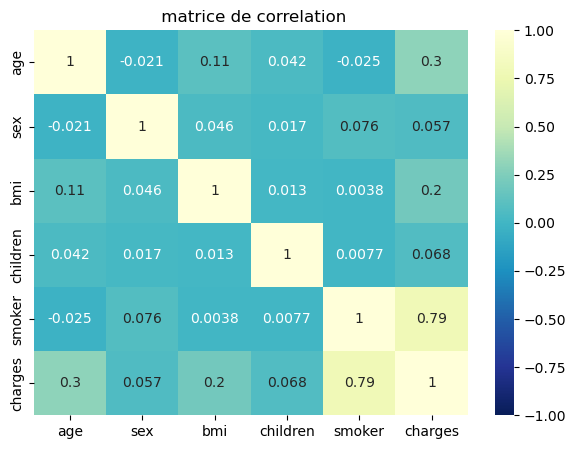

In [5]:
plt.figure(figsize=(7,5))
sns.heatmap(sp_data.corr(), vmin=-1, cmap="YlGnBu_r", annot=True)
plt.title(" matrice de correlation")

Text(0.5, 1.0, 'Number of Children')

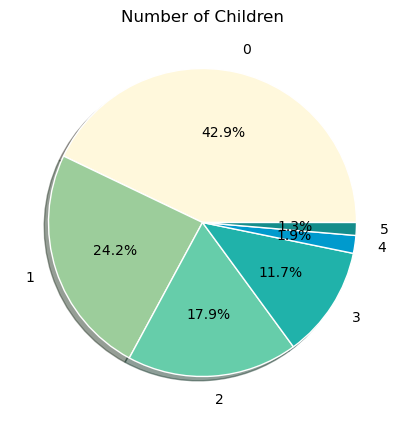

In [15]:

plt.figure(figsize=(5,5))
colors = ['#FFF8DC', '#9CCD9B', '#66CDAA', '#20B2AA',"#009ACD","#148D8B"]
Children=sp_data.children.value_counts().rename_axis('NumberofChildren').reset_index(name='count')
plt.pie(Children["count"].tolist(), labels=Children["NumberofChildren"].tolist(), labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors,
       autopct='%1.1f%%',shadow=True);
plt.title("Number of Children")

Text(0.5, 1.0, 'Region Distribution')

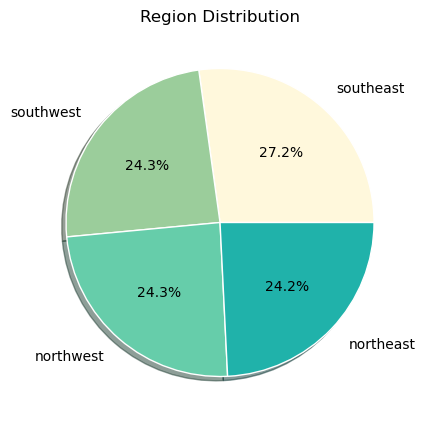

In [16]:
region=sp_data.region.value_counts().rename_axis('region').reset_index(name='count')
plt.figure(figsize=(5,5))
colors = ['#FFF8DC', '#9BCD9B', '#66CDAA', '#20B2AA']

plt.pie(region["count"].tolist(), labels=region["region"].tolist(), labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors,
       autopct='%1.1f%%', shadow=True);
plt.title("Region Distribution")

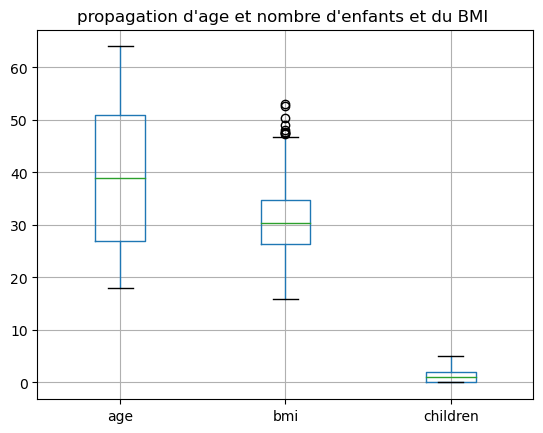

In [13]:
# sp_data['smoker']=sp_data.smoker.map(dict(yes=1, no=0))
# sp_data['sex']=sp_data.sex.map(dict(male=1, female=0))
# sp_data
newdata=sp_data.drop(['region', 'sex','smoker', 'charges'], axis=1)
plt.title("propagation d'age et nombre d'enfants et du BMI ")
newdata.boxplot()
plt.text=""


In [ ]:
plt.boxplot(sp_data['charges'])
plt.title("propagation des charges")
plt.text=""

In [14]:
z = sp_data['age'].fillna(0)

avg_open = statistics.mean(z) 
avg_open


39.20702541106129

In [ ]:
hmean = statistics.harmonic_mean(z)
hmean

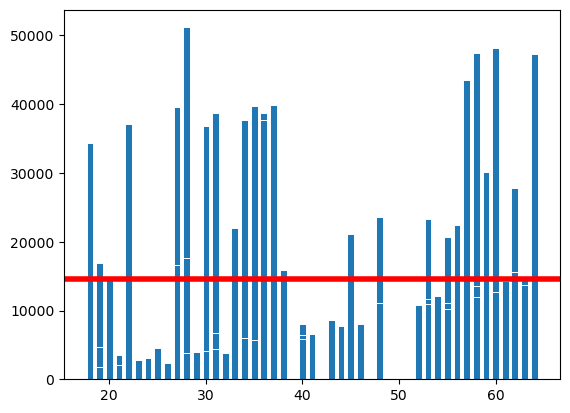

In [17]:
newDf=sp_data.iloc[:100]
newDf
#create scatter plot
plt.bar(newDf.age,newDf.charges, width=0.7, edgecolor="white", linewidth=0.7)

#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(newDf.charges),linewidth=4, color='r')

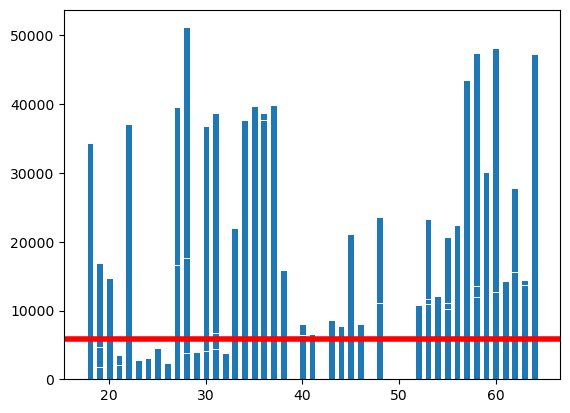

In [68]:
newDf=sp_data.iloc[:100]
newDf
#create scatter plot
plt.bar(newDf.age,newDf.charges, width=0.7, edgecolor="white", linewidth=0.7)

#add horizontal line at mean value of y
plt.axhline(statistics.harmonic_mean(newDf.charges),linewidth=4, color='r')

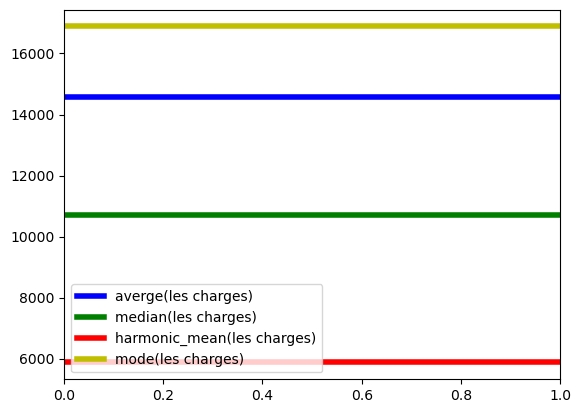

In [19]:
plt.axhline(np.nanmean(newDf.charges),linewidth=4, color='b' ,label='averge(les charges)')
plt.axhline(statistics.median(newDf.charges),linewidth=4, color='g', label='median(les charges)')
plt.axhline(statistics.harmonic_mean(newDf.charges),linewidth=4, color='r',label='harmonic_mean(les charges)')
plt.axhline(statistics.mode(newDf.charges),linewidth=4, color='y',label='mode(les charges)')
plt.legend()


10699.8606


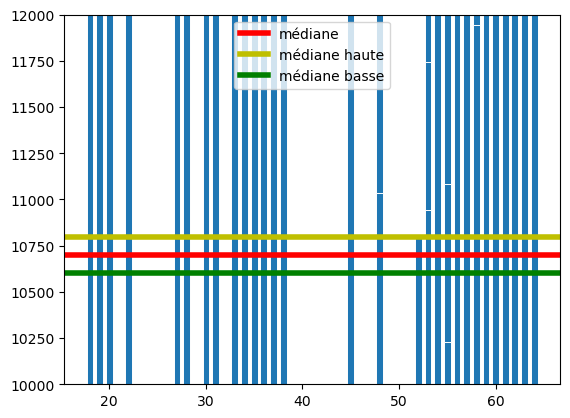

In [87]:
newDf=sp_data.iloc[:100]
newDf
#create scatter plot
plt.bar(newDf.age,newDf.charges, width=0.7, edgecolor="white", linewidth=0.7)

plt.axhline(statistics.median(newDf.charges),linewidth=4, color='r',label='médiane')

plt.axhline(statistics.median_high(newDf.charges),linewidth=4, color='y', label='médiane haute')

plt.axhline(statistics.median_low(newDf.charges),linewidth=4, color='g',label='médiane basse')
plt.ylim(10000, 12000)
plt.legend()
print(statistics.median(newDf.charges))

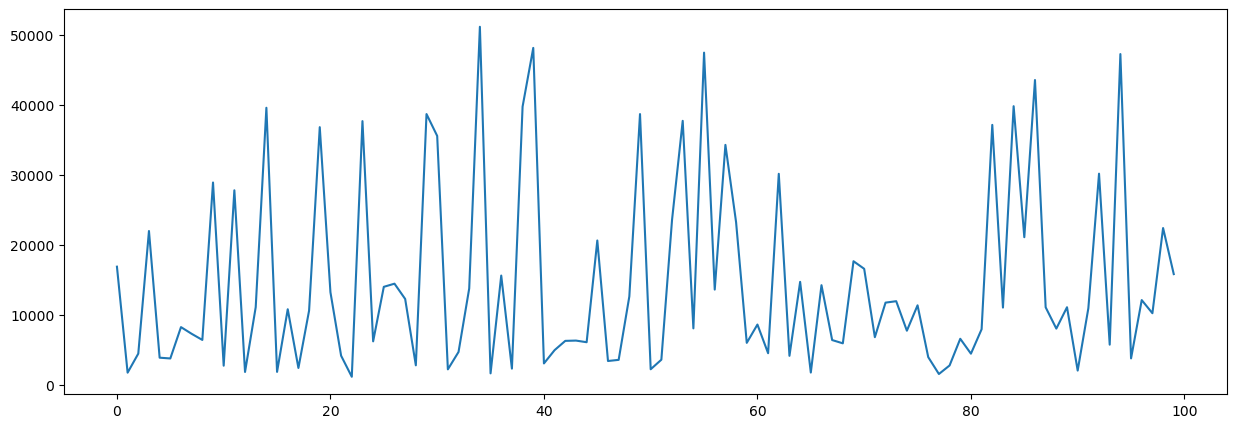

In [20]:
plt.figure(figsize=(15, 5))
# Create plot
plt.plot(newDf["charges"])

In [ ]:
plt.axhline(np.nanmean(newDf.age),linewidth=4, color='b' ,label='averge')
plt.axhline(statistics.median(newDf.age),linewidth=4, color='g', label='median')
plt.axhline(statistics.harmonic_mean(newDf.age),linewidth=4, color='r',label='harmonic_mean')
plt.axhline(statistics.mode(newDf.age),linewidth=4, color='y',label='mode')
plt.legend()